In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Define the paths to your train and test dataset
train_dir = '/content/drive/MyDrive/Dataset for gem spectrum model/Train'
test_dir = '/content/drive/MyDrive/Dataset for gem spectrum model/Test'

In [ ]:
# Specify the gem categories explicitly
categories = ['Diamond', 'Emerald', 'Sapphire Blue']

# Function to load images and labels
def load_data(data_dir):
    images = []
    labels = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (224, 224))  # Resize to the size expected by the network
                images.append(resized_arr)
                labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(images), np.array(labels)

In [ ]:
# Loading training and testing data
x_train, y_train = load_data(train_dir)
x_test, y_test = load_data(test_dir)

In [ ]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Initialize ImageDataGenerator with augmentation options
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create training data generator
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)

In [ ]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=l2(0.001)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.002), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // 32,
    epochs=20,
    validation_data=(x_test, y_test)
)

Epoch 1/20
3/3 [==============================] - 14s 3s/step - loss: 8.4314 - accuracy: 0.3913 - val_loss: 2.4559 - val_accuracy: 0.6154
Epoch 2/20
3/3 [==============================] - 13s 4s/step - loss: 2.5092 - accuracy: 0.5217 - val_loss: 1.8825 - val_accuracy: 0.8462
Epoch 3/20
3/3 [==============================] - 14s 5s/step - loss: 2.0606 - accuracy: 0.7396 - val_loss: 1.8209 - val_accuracy: 0.9231
Epoch 4/20
3/3 [==============================] - 11s 4s/step - loss: 2.1894 - accuracy: 0.7826 - val_loss: 1.8862 - val_accuracy: 0.9231
Epoch 5/20
3/3 [==============================] - 12s 5s/step - loss: 2.3068 - accuracy: 0.8116 - val_loss: 1.8215 - val_accuracy: 0.9231
Epoch 6/20
3/3 [==============================] - 14s 5s/step - loss: 2.0207 - accuracy: 0.8854 - val_loss: 1.7912 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 10s 3s/step - loss: 1.8576 - accuracy: 0.9710 - val_loss: 1.6744 - val_accuracy: 1.0000
Epoch 8/20
3/3 [==================

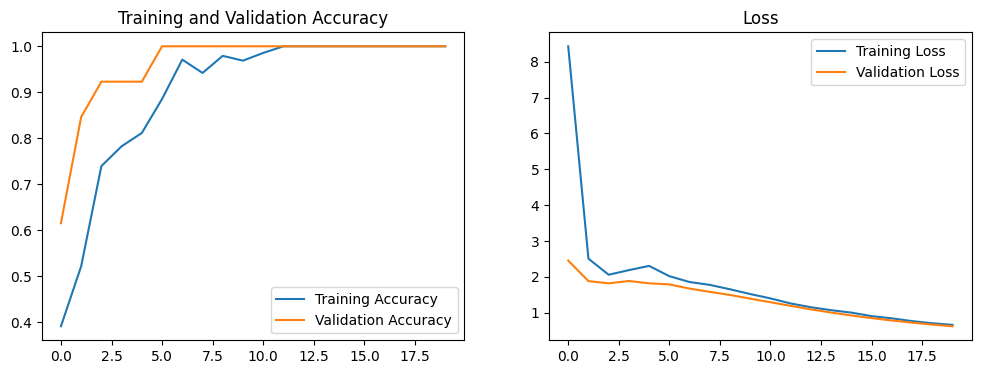

In [ ]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}%")

1/1 [==============================] - 1s 662ms/step - loss: 0.6234 - accuracy: 1.0000
Test accuracy: 1.00%


Saving diamond_3.jpg to diamond_3.jpg
1/1 [==============================] - 0s 284ms/step


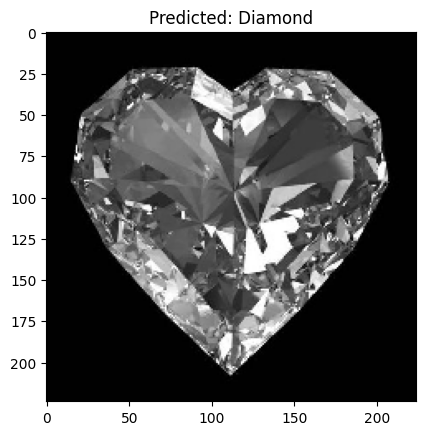

In [ ]:
from keras.preprocessing import image
from google.colab import files

def upload_and_predict(model):
    uploaded = files.upload()

    for fn in uploaded.keys():
        path = '/content/' + fn
        img = image.load_img(path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x / 255.0

        prediction = model.predict(x)
        predicted_class = categories[np.argmax(prediction)]

        plt.imshow(img)
        plt.title(f'Predicted: {predicted_class}')
        plt.show()

upload_and_predict(model)

In [ ]:

model.save('/content/drive/MyDrive/Dataset for gem spectrum model/best_gem_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
